In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\hp\OneDrive - Dev Garg\Documents\ME\SEM 5 online\ML\lab\titanic2.txt',delimiter = '\t')

In [3]:
df

,pclass,age,sex,survived
0,1st,adult,male,yes
1,1st,adult,male,yes
2,1st,adult,male,yes
3,1st,adult,male,yes
4,1st,adult,male,yes
...,...,...,...,...
2196,crew,adult,female,yes
2197,crew,adult,female,yes
2198,crew,adult,female,no
2199,crew,adult,female,no


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [5]:
# 0,1,2,3 (numbers me convert hojayega data)
df['pclass'] = le.fit_transform(df['pclass'])
df['age'] = le.fit_transform(df['age'])
df['sex'] = le.fit_transform(df['sex'])

In [6]:
df['survived'] = le.fit_transform(df['survived'])

In [7]:
df

,pclass,age,sex,survived
0,0,0,1,1
1,0,0,1,1
2,0,0,1,1
3,0,0,1,1
4,0,0,1,1
...,...,...,...,...
2196,3,0,0,1
2197,3,0,0,1
2198,3,0,0,0
2199,3,0,0,0


In [8]:
x=df.iloc[:,0:3]
y=df.iloc[:,-1]
print(x)
print(y)

      pclass  age  sex
0          0    0    1
1          0    0    1
2          0    0    1
3          0    0    1
4          0    0    1
...      ...  ...  ...
2196       3    0    0
2197       3    0    0
2198       3    0    0
2199       3    0    0
2200       3    0    0

[2201 rows x 3 columns]
0       1
1       1
2       1
3       1
4       1
       ..
2196    1
2197    1
2198    0
2199    0
2200    0
Name: survived, Length: 2201, dtype: int32


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

In [14]:
from sklearn import tree

In [15]:
t=tree.DecisionTreeClassifier(criterion='entropy') #model banao

In [16]:
t=t.fit(X_train,y_train) #trained the model now
t

DecisionTreeClassifier(criterion='entropy')

In [26]:
import matplotlib.pyplot as plt

In [27]:
parameters = ['variance','skewness','kurtosis','entropy']
output = ['0','1']

In [28]:
from sklearn.metrics import confusion_matrix
ypred = t.predict(X_test)
cm = confusion_matrix(y_test, ypred)
ypred

array([0, 1, 0, ..., 0, 0, 0])

[Text(2150.625, 2768.3333333333335, 'r <= 0.5\nentropy = 0.9\nsamples = 440\nvalue = [301, 139]\nclass = o'),
 Text(1162.5, 2265.0, 'p <= 1.5\nentropy = 0.852\nsamples = 90\nvalue = [25, 65]\nclass = p'),
 Text(697.5, 1761.6666666666667, 'a <= 0.5\nentropy = 0.262\nsamples = 45\nvalue = [2, 43]\nclass = p'),
 Text(465.0, 1258.3333333333335, 'p <= 0.5\nentropy = 0.276\nsamples = 42\nvalue = [2, 40]\nclass = p'),
 Text(232.5, 755.0, 'entropy = 0.229\nsamples = 27\nvalue = [1, 26]\nclass = p'),
 Text(697.5, 755.0, 'entropy = 0.353\nsamples = 15\nvalue = [1, 14]\nclass = p'),
 Text(930.0, 1258.3333333333335, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = p'),
 Text(1627.5, 1761.6666666666667, 'p <= 2.5\nentropy = 1.0\nsamples = 45\nvalue = [23, 22]\nclass = o'),
 Text(1395.0, 1258.3333333333335, 'a <= 0.5\nentropy = 0.993\nsamples = 42\nvalue = [23, 19]\nclass = o'),
 Text(1162.5, 755.0, 'entropy = 0.991\nsamples = 36\nvalue = [20, 16]\nclass = o'),
 Text(1627.5, 755.0, 'entropy = 1.

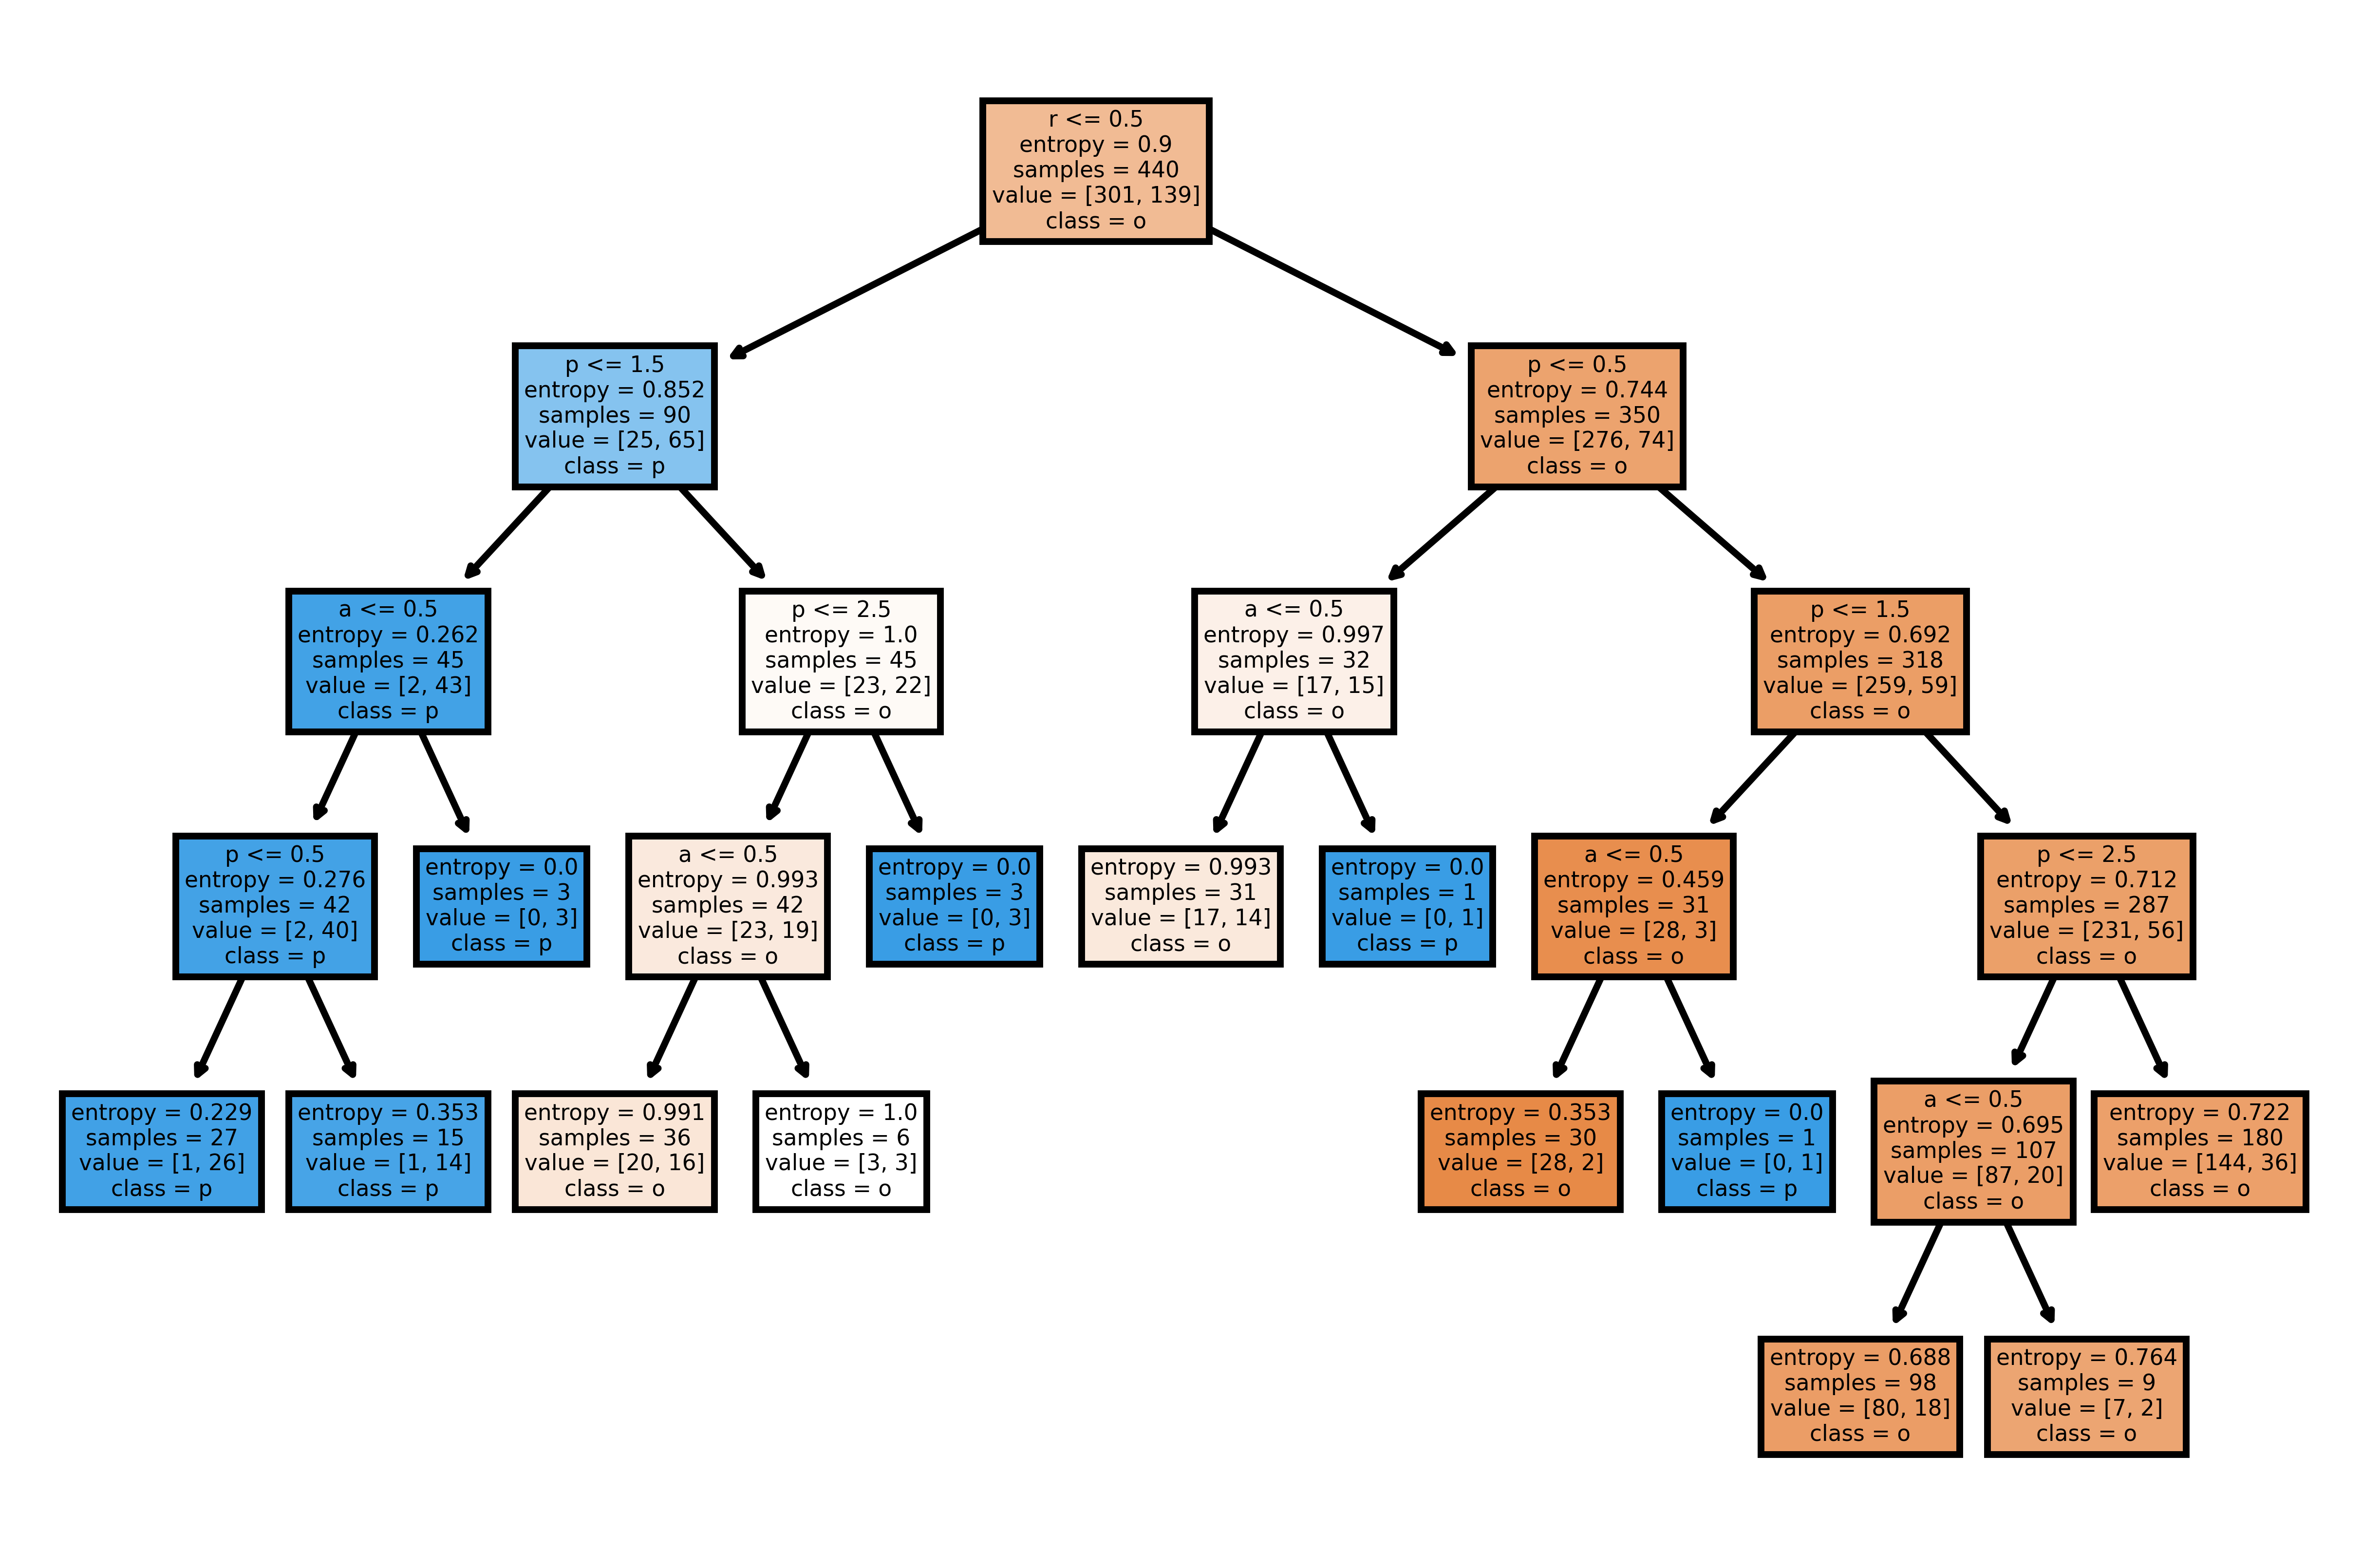

In [31]:
#fig = plt.figure(figsize=(25,20))
figure,axis = plt.subplots(dpi=1000) #dots per inch
tree.plot_tree(t,feature_names='parameters',class_names='op',filled=True)

In [156]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, ypred))

0.7910278250993753


In [81]:
from sklearn import metrics
print(metrics.classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1189
           1       0.93      0.39      0.55       572

    accuracy                           0.79      1761
   macro avg       0.85      0.69      0.71      1761
weighted avg       0.82      0.79      0.76      1761

